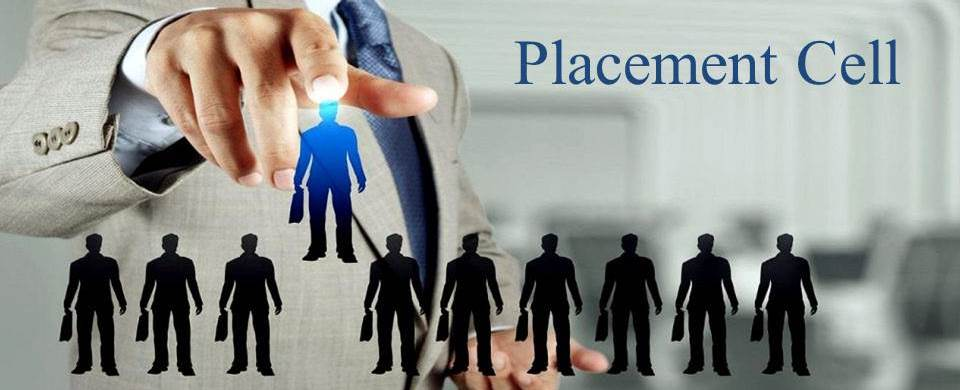

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('placementdata.csv')

In [ ]:
df.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,0,0,61,79,0
1,2,8.9,0,3,2,90,4.0,1,1,78,82,1
2,3,7.3,1,2,2,82,4.8,1,0,79,80,0
3,4,7.5,1,1,2,85,4.4,1,1,81,80,1
4,5,8.3,1,2,2,86,4.5,1,1,74,88,1


Label Encoding :- Converting categorical data into numerical data !!!!

In [ ]:
df['PlacementStatus'] = df['PlacementStatus'].map({'Placed': 1, 'NotPlaced': 0})
df['ExtracurricularActivities']=df['ExtracurricularActivities'].map({'Yes':1,'No':0})
df['PlacementTraining']=df['PlacementTraining'].map({'Yes':1,'No':0})

In [ ]:
df.PlacementStatus.value_counts()
#df.ExtracurricularActivities.value_counts()
#df.PlacementTraining.value_counts()

,count
ExtracurricularActivities,
1,5854
0,4146


In [ ]:
df.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [ ]:
df.drop('StudentID', axis=1)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,0,0,61,79,0
1,8.9,0,3,2,90,4.0,1,1,78,82,1
2,7.3,1,2,2,82,4.8,1,0,79,80,0
3,7.5,1,1,2,85,4.4,1,1,81,80,1
4,8.3,1,2,2,86,4.5,1,1,74,88,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,1,0,85,66,0
9996,7.4,0,1,0,90,4.8,0,0,84,67,1
9997,8.4,1,3,0,70,4.8,1,1,79,81,1
9998,8.9,0,3,2,87,4.8,1,1,71,85,1


PlacementStatus is Dependent on X .

In [ ]:
x=df.drop('PlacementStatus',axis=1)
y=df['PlacementStatus']

In [ ]:
x.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks
0,1,7.5,1,1,1,65,4.4,0,0,61,79
1,2,8.9,0,3,2,90,4.0,1,1,78,82
2,3,7.3,1,2,2,82,4.8,1,0,79,80
3,4,7.5,1,1,2,85,4.4,1,1,81,80
4,5,8.3,1,2,2,86,4.5,1,1,74,88


In [ ]:
y

,PlacementStatus
0,0
1,1
2,0
3,1
4,1
...,...
9995,0
9996,1
9997,1
9998,1


PLACED V/S  NOT PLACED COMPARISON

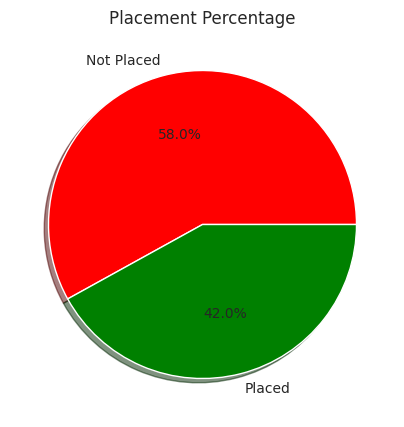

In [ ]:
labels = ['Not Placed', 'Placed']
sizes = df['PlacementStatus'].value_counts().sort_index()
colors = ['red', 'green']
plt.figure(figsize=(5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors,shadow=True)
plt.title("Placement Percentage")
plt.show()

**Splitting Data into TRAINING & TESTING**

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x_train)

8000

In [ ]:
len(x_test )

2000

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# MODEL BUILDING

Libraries Importing

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [ ]:
models ={
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'LogisticRegression':LogisticRegression(),
    'SVC':SVC(),
    'GaussianNB':GaussianNB(),
    'KNeighborsClassifier':KNeighborsClassifier()
}

In [ ]:
results_model={}

In [ ]:
for name , model in models.items():
  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  acc=accuracy_score(y_test,pred)
  results_model[name]=acc

MODEL PERFORMANCES


In [ ]:
for model, acc in results_model.items():
    print(f"{model}: {acc:.2f}")

DecisionTreeClassifier: 0.72
RandomForestClassifier: 0.78
LogisticRegression: 0.79
SVC: 0.80
GaussianNB: 0.79
KNeighborsClassifier: 0.77


In [ ]:
from sklearn.metrics import classification_report , confusion_matrix , precision_score , recall_score , f1_score

In [ ]:
matrix=confusion_matrix(y_test,pred)
prec=precision_score(y_test,pred)
rec=recall_score(y_test,pred)
fscore=f1_score(y_test,pred)
report= classification_report(y_test,pred)
print("Confusion Matrix :- ", matrix)
print("Precision Score :- ", prec)
print("Recall Score :- ", rec)
print("F1 Score :- ", fscore)
print("Classification Report :- ", report)

Confusion Matrix :-  [[950 222]
 [236 592]]
Precision Score :-  0.7272727272727273
Recall Score :-  0.714975845410628
F1 Score :-  0.7210718635809987
Classification Report :-                precision    recall  f1-score   support

           0       0.80      0.81      0.81      1172
           1       0.73      0.71      0.72       828

    accuracy                           0.77      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.77      0.77      0.77      2000



In [ ]:
best_model = max(results_model, key=results_model.get)
print(" Best Performing Model: ", best_model ,"with ", results_model[best_model] , "accuracy")

 Best Performing Model:  SVC with  0.795 accuracy


**Accuracy Score Comparison B/W  Different MODELS**

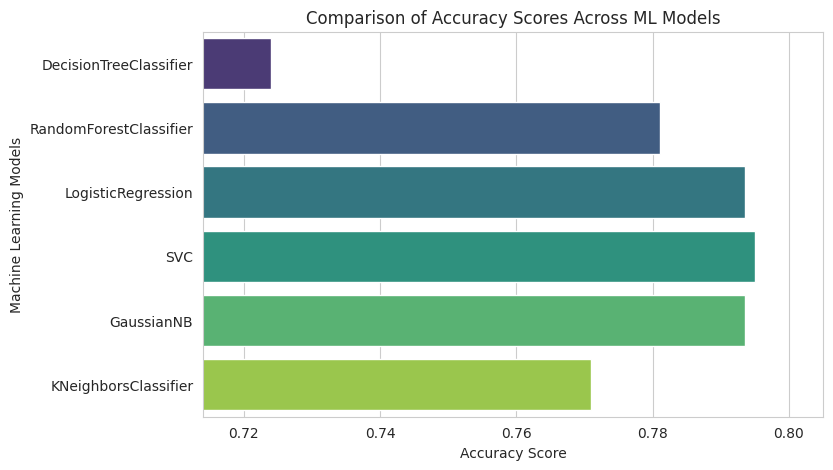

In [ ]:
model_names = list(results_model.keys())
accuracy_scores = list(results_model.values())

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(x=accuracy_scores, y=model_names, palette="viridis")

plt.xlabel("Accuracy Score")
plt.ylabel("Machine Learning Models")
plt.title("Comparison of Accuracy Scores Across ML Models")
plt.xlim(min(accuracy_scores) - 0.01, max(accuracy_scores) + 0.01)
plt.xticks()


plt.show()

**PREDICTION**

In [ ]:
data = [[17, 8.6, 1, 3, 2, 88, 4.2, 0, 1, 79, 87]]
columns = ["StudentID", "CGPA", "Internships", "Projects", "Workshops/Certifications",
           "AptitudeTestScore", "SoftSkillsRating", "ExtracurricularActivities",
           "PlacementTraining", "SSC_Marks", "HSC_Marks"]

new_df = pd.DataFrame(data, columns=columns)

single = model.predict(new_df)[0]

proba = model.predict_proba(new_df)[0]

if len(proba) == 2:
    probability_of_placement = proba[1]
else:
    probability_of_placement = proba[0]

if single == 1:
    output = "The Student will be Placed!!!!"
    output1 = " \nProbability of being placed: {:.2f}%".format(probability_of_placement * 100)
else:
    output = "The Student will not be Placed!!!!"
    output1 = "\nBetter Luck next Time !!!!"

print(output + output1)


The Student will be Placed!!!! 
Probability of being placed: 100.00%


Placed V/s Not-Placed Comparison of predicted Data

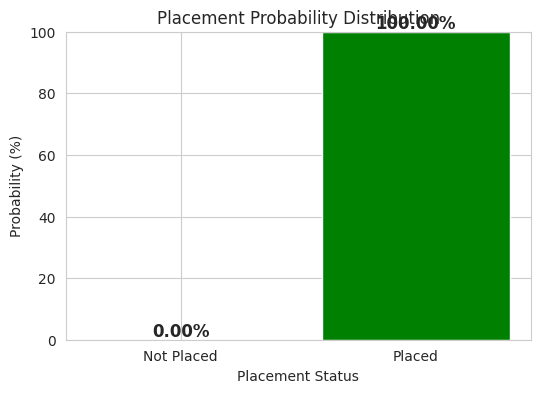

In [ ]:
labels = ["Not Placed", "Placed"]
probabilities = [proba[0] * 100, proba[1] * 100]

plt.figure(figsize=(6, 4))
plt.bar(labels, probabilities, color=['red', 'green'])

plt.xlabel("Placement Status")
plt.ylabel("Probability (%)")
plt.title("Placement Probability Distribution")
plt.ylim(0, 100)

plt.show()

